# Test: Reduce car use?

**Should car users pay more tax? Should we reduce car use for the sake
of the environment?**

This book uses R coding to explore public attitudes to car use and
environmental crisis. Follow the steps to create

-   descriptive statistics.

-   data visualisations (bar charts).

## Set-up

Run the code below before starting the exercise, this code opens
packages we need to analyse the data. The \### are notes that explain
the purpose of the code. Annotating code helps humans understand what is
going on.

In [ ]:
#install packages...

library(haven)  ### To open Stata or SPSS datasets
library(dplyr)  ### For data manipulation 

## Data

The dataset is [British Social Attitudes Survey, 2017, Environment and
Politics: Open Access Teaching
Dataset](University%20of%20Manchester,%20Cathie%20Marsh%20Institute%20for%20Social%20Research%20(CMIST),%20UK%20Data%20Service.%20(2022).%20British%20Social%20Attitudes%20Survey,%202017,%20Environment%20and%20Politics:%20Open%20Access%20Teaching%20Dataset.%20%5Bdata%20collection%5D.%20NatCen%20Social%20Research,%20%5Boriginal%20data%20producer(s)%5D.%20NatCen%20Social%20Research.%20SN:%208849,%20DOI:%20http://doi.org/10.5255/UKDA-SN-8849-1)
(Study number 8849). Use the code to read in the data.

In [ ]:
BSAenviro <- read_dta("https://raw.githubusercontent.com/JenniferLB/Open_data/master/bsa2017_open_enviropol.dta") %>%
  mutate(across(
    c(cartaxhi, carnod2, carreduc, carallow, carenvdc),
    as_factor
  ))

## Let’s explore

Let’s start by looking at the data. The code below produces a summary of
the data.

In [ ]:
dim(BSAenviro) ### how many cases and variables?

[1] 3988   25

 [1] "Sserial"          "Rsex"             "RAgeCat"          "Married"         
 [5] "ChildHh"          "HEdQual3"         "eq_inc_quintiles" "RClassGp"        
 [9] "CCBELIEV"         "carallow"         "carreduc"         "carnod2"         
[13] "cartaxhi"         "carenvdc"         "plnenvt"          "plnuppri"        
[17] "Politics"         "Voted"            "actchar"          "actpol"          
[21] "govnosa2"         "PartyId2"         "leftrigh"         "libauth"         
[25] "WtFactor"        

Questions

1.  How many variables and cases?

2.  What is the name of the 11th variable?

The 11th variable is called `carreduc`. What does this mean? Let’s use
code to find out more.

In [ ]:
attr(BSAenviro$carreduc,"label") # Variable labels are stored as attibutes, which we can look at. 

[1] "For the environment everyone should reduce how much they use cars"

## Attitudes towards car use and the environment

We are now going to explore attitudes towards car use and the
environment. Above we encountered the variable `carreduc`. We are also
going to examine `Cartaxhi`. How would we change the code below to
inspect the variable label? Have a go and see.

In [ ]:
attr(BSAenviro$carreduc,"label")

[1] "For the environment everyone should reduce how much they use cars"

How were these questions asked in the survey? You can check the survey
[Questionnairre](https://doc.ukdataservice.ac.uk/doc/8450/mrdoc/pdf/8450_bsa_2017_full_questionnaire_documentation.pdf)
to find out (see page 170). Or see the picture below.

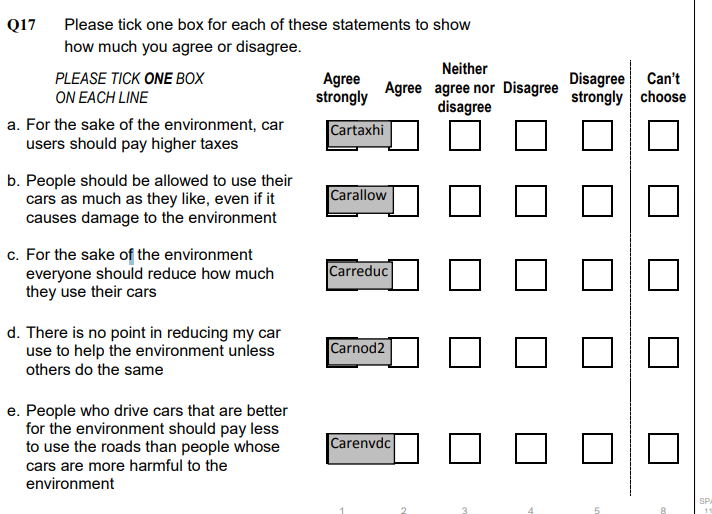

Now let’s look at the responses to the questions.

In [ ]:
table(BSAenviro$cartaxhi)


                   skipped             agree strongly 
                      3140                         27 
                     agree neither agree nor disagree 
                       193                        195 
                  disagree          disagree strongly 
                       318                         69 
             cannot choose               not answered 
                        24                         22 


                   skipped             agree strongly 
                      3140                         97 
                     agree neither agree nor disagree 
                       422                        195 
                  disagree          disagree strongly 
                        81                         16 
             cannot choose               not answered 
                        18                         19 

From the tables above we get a glimpse of the data. But, we can do some
improvements.

-   One issue to address is that survey data can include non-substantive
    options like *“skipped”*, *“not answered”*, or *“cannot choose”*. In
    this case, we will assign them as missing values (`NA`).

-   We can also organise the categories to reflect their ordering
    i.e. agree, strongly, agree etc.

The code below will do this data cleaning work for our two variables as
well as other variables from the same set of questions. It is important
to runt he code, before we make the tables.

In [ ]:
clean_agreement_var <- function(x) {
  var_label <- attr(x, "label")  # store the label before modifying
  
  x <- as.character(x)
  x <- case_when(
    x %in% c("skipped", "not answered", "cannot choose") ~ NA_character_,
    TRUE ~ x
  )
  
  x <- factor(x, levels = c(
    "agree strongly",
    "agree",
    "neither agree nor disagree",
    "disagree",
    "disagree strongly"
  ), ordered = TRUE)
  
  attr(x, "label") <- var_label  # re-attach the label
  x
}

In [ ]:
BSAenviro %>%
  filter(!is.na(cartaxhi)) %>%
  count(cartaxhi, name = "n") %>%
  mutate(percent = round(n / sum(n) * 100, 1)) %>%
  knitr::kable(caption = "Attitudes toward higher car taxation (cartaxhi)")

In [ ]:
BSAenviro %>%
  filter(!is.na(carallow)) %>%
  count(carallow, name = "n") %>%
  mutate(percent = round(n / sum(n) * 100, 1)) %>%
  knitr::kable()